$y^{2} = x^{3} + a * x + b$

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_elliptic_curve(a, b):
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a * x - b, 0)
    plt.grid()

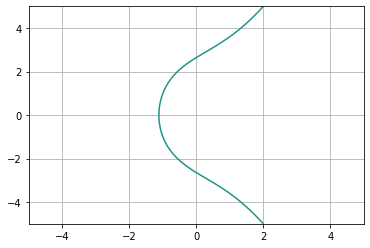

In [67]:
plot_elliptic_curve(5, 7)

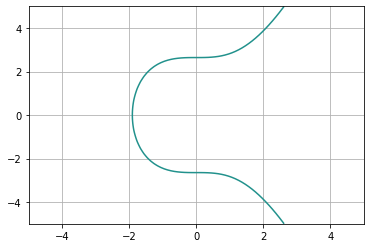

In [68]:
plot_elliptic_curve(0, 7)

<img src="img1.png">

<img src="img2.png">
$P_{1} = (x_{1}, y_{1}), P_{2} = (x_{2}, y_{2}), P_{3} = (x_{3}, y_{3})$
<br><br>
$P_{1} + P_{2} = P_{3}$
<br><br>
$s = \frac {y_{2} - y_{1}}{x_{2} - x_{1}}, y = s * (x - x_{1}) + y_{1}$ (1)
<br><br>
$y^{2} = (s * (x - x_{1}) + y_{1})^{2} = x^{3} + a * x + b$
<br><br>
$s^{2}(x - x_{1})^{2} + 2s * (x - x_{1})*y_{1} + y_{1}^{2} = x^{3} + a * x + b$
<br><br>
$s^{2}(x^{2} - 2xx_{1} + x_{1}^{2}) + 2s * (x - x_{1})*y_{1} + y_{1}^{2} = x^{3} + a * x + b$
<br><br>
$s^{2}x^{2} - 2xx_{1}s^{2} + x_{1}^{2}s^{2} + 2sxy_{1} - 2sx_{1}y_{1} + y_{1}^{2} = x^{3} + a * x + b$
<br><br>
$x^{3} + a * x + b - s^{2}x^{2} + 2xx_{1}s^{2} - x_{1}^{2}s^{2} - 2sxy_{1} + 2sx_{1}y_{1} - y_{1}^{2} = 0$
<br><br>
$x^{3} - s^{2}x^{2} + (a + 2x_{1}s^{2} - 2sy_{1})x - x_{1}^{2}s^{2} + 2sx_{1}y_{1} - y_{1}^{2} + b = 0$ (2)
<br><br>
$(x - x_{1})(x - x_{2})(x - x_{3}) = 0$
<br><br>
$x^{3} - (x_{1} + x_{2} + x_{3})x^{2} + (x_{1}x_{2} + x_{1}x_{3} + x_{2}x_{3})x - x_{1}x_{2}x_{3} = 0$ (3)
<br><br>
$s^{2} = x_{1} + x_{2} + x_{3}$
<br><br>
$x_{3} = s^{2} - x_{1} - x_{2}$ (4)
<br><br>
$y_{3} = -(s(x_{3} - x_{1}) + y_{1})$
<br><br>
$= s(x_{1} - x_{3}) - y_{1}$ (5)

<img src="img3.png">
$y^{2} = x^{3} + a * x + b$
<br><br>
$2ydy = (3x^{2} + a)dx$
<br><br>
$s = \frac{dy}{dx} = \frac{3x^{2} + a}{2y}$ (6)
<br><br>
$x_{3} = s^{2} - 2x_{1}$ (7)
<br><br>
$y_{3} = s(x_{1} - x_{3}) - y_{1}$ (8)

<img src="img4.png">

In [62]:
class Point:
    def __init__(self, x, y, a, b):
        self.x = x
        self.y = y
        self.a = a
        self.b = b
        if self.x == None and self.y == None:
            return 
        if self.y ** 2 != self.x ** 3 + a * x + b:
            raise ValueError("({0}, {1}) is not on the curve.".format(x, y))
            
    def __repr__(self):
        if self.x is None and self.y is None:
            return "Point(Infinity)"
        else:
            return "Point({0}, {1})_{2}_{3}".format(self.x, self.y, self.a, self.b)
        
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.a == other.a and self.b == other.b
    
    def __ne__(self, other):
        return self.x != other.x or self.y != other.y or self.a != other.a or self.b != other.b
    
    def __add__(self, other):
        if self.a != other.a or self.b != other.b:
            raise TypeError("Point {0} and {1} are not on the same curve".format(self, other))
            
        if self.x is None:
            return other
        
        if other.x is None:
            return self
        
        if self.x == other.x and self.y == -other.y:
            return self.__class__(None, None, self.a, self.b)
        
        if self.x != other.x:
            s = (other.y - self.y)/(other.x - self.x)
            x = s ** 2 - self.x - other.x
            y = s * (self.x - x) - self.y
            return self.__class__(x, y, self.a, self.b)
        
        if self == other:
            if self.y == 0:
                return self.__class__(None, None, self.a, self.b)
            else:
                s = (3 * self.x ** 2 + self.a) / (2 * self.y)
                x = s ** 2 - 2 * self.x
                y = s * (self.x - x) - self.y
                return self.__class__(x, y, self.a, self.b)

#### Reference: "Programming Bitcoin: Learn How to Program Bitcoin from Scratch", 1st Edition, 2019